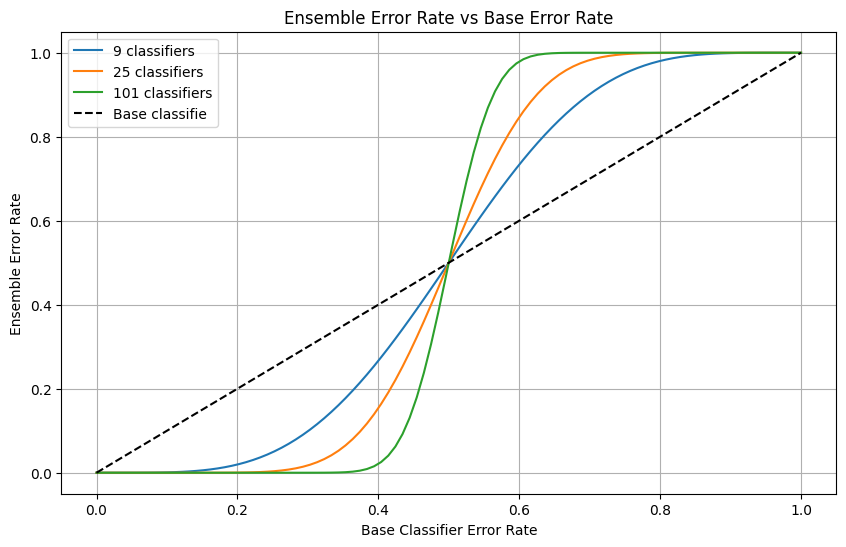

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def ensemble_error(base_error, n_classifiers):
    # 計算集成分類器錯誤的概率
    k = n_classifiers // 2 + 1
    probs = [comb(n_classifiers, i) * (base_error ** i) * ((1 - base_error) ** (n_classifiers - i)) 
             for i in range(k, n_classifiers + 1)]
    return sum(probs)

# 生成基礎錯誤率範圍
base_errors = np.linspace(0, 1, 100)

# 計算不同集成大小的錯誤率
ensemble_9 = [ensemble_error(e, 9) for e in base_errors]
ensemble_25 = [ensemble_error(e, 25) for e in base_errors]
ensemble_101 = [ensemble_error(e, 101) for e in base_errors]

# plt.figure
plt.figure(figsize=(10, 6))
plt.plot(base_errors, ensemble_9, label = '9 classifiers')
plt.plot(base_errors, ensemble_25, label = '25 classifiers')
plt.plot(base_errors, ensemble_101, label = '101 classifiers')
plt.plot(base_errors, base_errors, 'k--', label = 'Base classifie')

plt.xlabel('Base Classifier Error Rate')
plt.ylabel('Ensemble Error Rate')
plt.title('Ensemble Error Rate vs Base Error Rate')
plt.legend()
plt.grid(True)
plt.show()

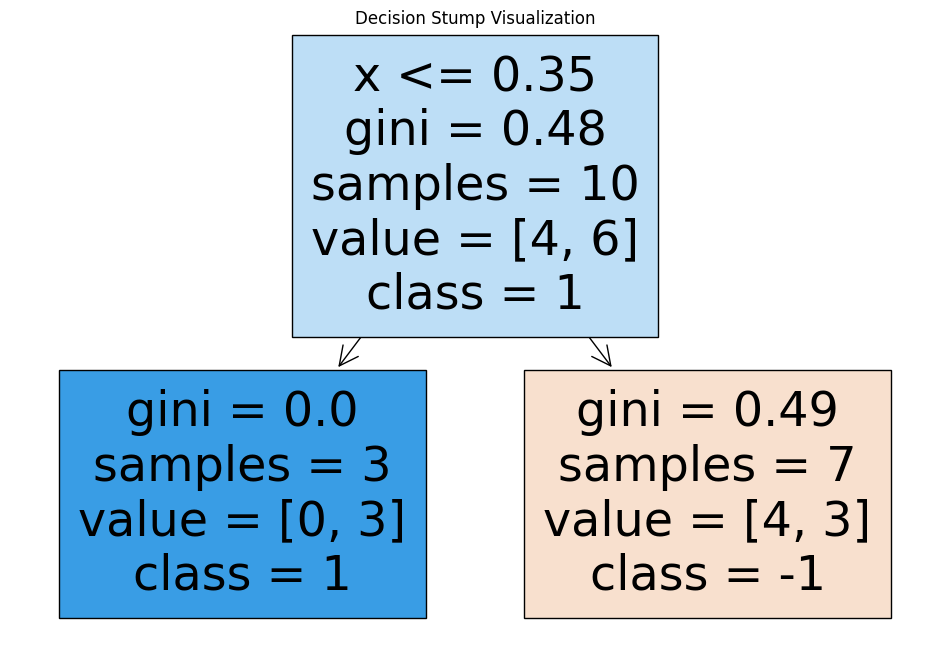

Feature importance: [1.]
Threshold: 0.3500000089406967
Left child prediction: [[0. 3.]]
Right child prediction: [[4. 3.]]


In [3]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 數據集
X = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]).reshape(-1, 1)
y = np.array([1, 1, 1, -1, -1, -1, -1, 1, 1, 1])

# 創建決策樹樁分類器
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X, y)

# 繪製決策樹
plt.figure(figsize=(12, 8))
plot_tree(stump, filled=True, feature_names=['x'], class_names=['-1', '1'])
plt.title('Decision Stump Visualization')
plt.show()

# 打印決策樹的詳細信息
print("Feature importance:", stump.feature_importances_)
print("Threshold:", stump.tree_.threshold[0])
print("Left child prediction:", stump.tree_.value[1])
print("Right child prediction:", stump.tree_.value[2])

In [4]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

def decision_stump(X, y, weights):
    stump = DecisionTreeClassifier(max_depth=1, random_state=42)
    stump.fit(X, y, sample_weight=weights)
    return stump

def adaboost(X, y, num_rounds=3):
    n_samples = len(X)
    weights = np.ones(n_samples) / n_samples
    
    classifiers = []
    alphas = []
    
    for t in range(num_rounds):
        print(f"\nRound {t+1}")
        
        # Train decision stump
        stump = decision_stump(X, y, weights)
        predictions = stump.predict(X)
        
        # Calculate error and alpha
        err = np.sum(weights * (predictions != y)) / np.sum(weights)
        alpha = 0.5 * np.log((1 - err) / err)
        
        # Update weights
        weights *= np.exp(-alpha * y * predictions)
        weights /= np.sum(weights)
        
        classifiers.append(stump)
        alphas.append(alpha)
        
        print(f"Error: {err:.4f}")
        print(f"Alpha: {alpha:.4f}")
        print("Updated weights:", weights)
    
    return classifiers, alphas

# Dataset
X = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]).reshape(-1, 1)
y = np.array([1, 1, 1, -1, -1, -1, -1, -1, 1, 1])

# Training data for each round
X_rounds = [
    np.array([0.1, 0.4, 0.5, 0.6, 0.6, 0.7, 0.7, 0.7, 0.8, 0.9]).reshape(-1, 1),
    np.array([0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3]).reshape(-1, 1),
    np.array([0.2, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.6, 0.6, 0.7]).reshape(-1, 1)
]
y_rounds = [
    np.array([1, -1, -1, -1, -1, -1, -1, -1, -1, 1]),
    np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
    np.array([1, 1, -1, -1, -1, -1, -1, -1, -1, -1])
]

# Run AdaBoost
classifiers, alphas = adaboost(X, y, num_rounds=3)

# Final classifier
def final_classifier(X, classifiers, alphas):
    predictions = np.array([clf.predict(X) for clf in classifiers])
    return np.sign(np.dot(alphas, predictions))

# Test final classifier
X_test = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]).reshape(-1, 1)
final_predictions = final_classifier(X_test, classifiers, alphas)
print("\nFinal predictions:", final_predictions)


Round 1
Error: 0.2000
Alpha: 0.6931
Updated weights: [0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.25   0.25  ]

Round 2
Error: 0.1875
Alpha: 0.7332
Updated weights: [0.16666667 0.16666667 0.16666667 0.03846154 0.03846154 0.03846154
 0.03846154 0.03846154 0.15384615 0.15384615]

Round 3
Error: 0.1923
Alpha: 0.7175
Updated weights: [0.1031746 0.1031746 0.1031746 0.1       0.1       0.1       0.1
 0.1       0.0952381 0.0952381]

Final predictions: [ 1.  1.  1. -1. -1. -1. -1. -1.  1.  1.]
